In [68]:
import pandas as pd
import numpy as np
#import files into DataFrames using pandas and drop duplicate and null values for each file
cabData = pd.read_csv('Cab_Data.csv', index_col=False)
cabData.dropna(subset=cabData.columns, inplace=True)
cabData.drop_duplicates(subset=['Transaction ID'], inplace=True)
cityData = pd.read_csv('City.csv', index_col=False)
cityData.dropna(subset=cityData.columns, inplace=True)
cityData.drop_duplicates(subset=['City'], inplace=True)
customerData = pd.read_csv('Customer_ID.csv', index_col=False)
customerData.dropna(subset=customerData.columns, inplace=True)
customerData.drop_duplicates(subset=['Customer ID'], inplace=True)
transactionData = pd.read_csv('Transaction_ID.csv', index_col=False)
transactionData.dropna(subset=transactionData.columns, inplace=True)
transactionData.drop_duplicates(subset=['Transaction ID'], inplace=True)
#perform merges
transactionData = transactionData.merge(customerData, on="Customer ID", how='left')
cabData = cabData.merge(transactionData, on="Transaction ID", how="left")
#convert numeric columns to proper int format and separate month and year from date to make analysis easier
cityData.loc[:, 'Population'] = cityData['Population'].str.replace(',', '').astype(int)
cityData.loc[:, 'Users'] = cityData['Users'].str.replace(",", "").astype(int)
cabData.loc[:, 'Year'] = cabData['Date of Travel'].str.split("/").str[2]
cabData.loc[:, 'Month'] = cabData['Date of Travel'].str.split("/").str[0]
#remove null rows and duplicate transactions from merged database
cityData.dropna(subset=cityData.columns, inplace=True)
cabData.dropna(subset=cabData.columns, inplace=True)
cabData.drop_duplicates(subset=['Transaction ID'], inplace=True)

<Axes: xlabel='KM Travelled', ylabel='Price Charged'>

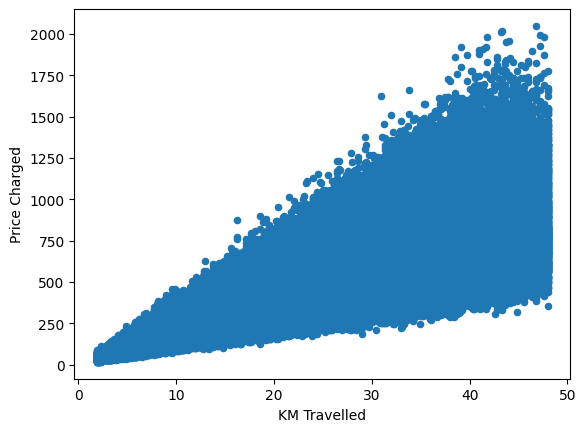

In [69]:
#First establish that the price charged is proportional to the distance traveled
cabData.plot(kind="scatter", x="KM Travelled", y="Price Charged")

In [70]:
#perform outlier detection based on distance traveled and price charged
firstQ = cabData['KM Travelled'].quantile(.25)
thirdQ = cabData['KM Travelled'].quantile(.75)
iqr = thirdQ - firstQ
priceFirstQ = cabData['Price Charged'].quantile(.25)
priceThirdQ = cabData['Price Charged'].quantile(.75)
priceIQR = priceThirdQ - priceFirstQ
indexesToDrop = []
for i in range(len(cabData['KM Travelled'])):
    if cabData['KM Travelled'][i] < firstQ - 1.5*iqr or cabData['KM Travelled'][i] > thirdQ + 1.5*iqr or cabData['Price Charged'][i] < priceFirstQ - 1.5*priceIQR or cabData['Price Charged'][i] > priceThirdQ + 1.5*priceIQR:
        indexesToDrop += [i]
cabData.drop(indexesToDrop, inplace=True)
cabData.to_csv('finalCabData.csv', index=False)

In [71]:
#add more columns to aid in profit analysis
cabData.loc[:, 'Profit'] = cabData['Price Charged'] - cabData['Cost of Trip']
cabData.loc[:, 'Profit Margin'] = (cabData['Profit']/cabData['Price Charged'])*100

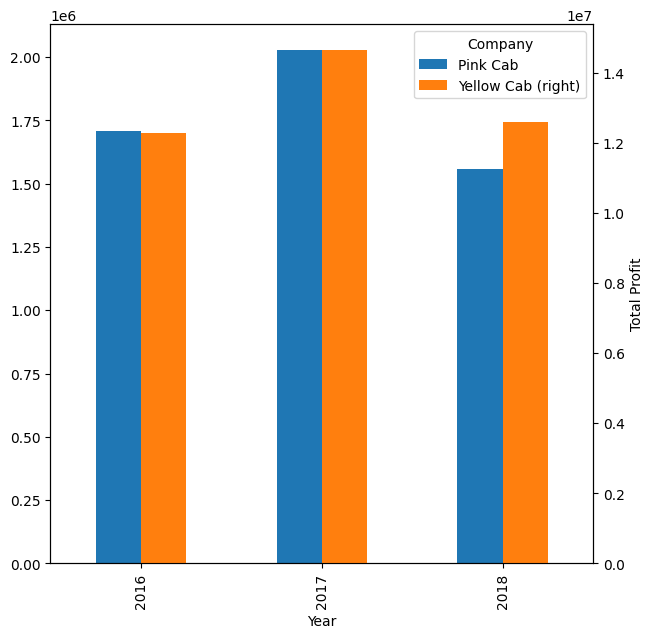

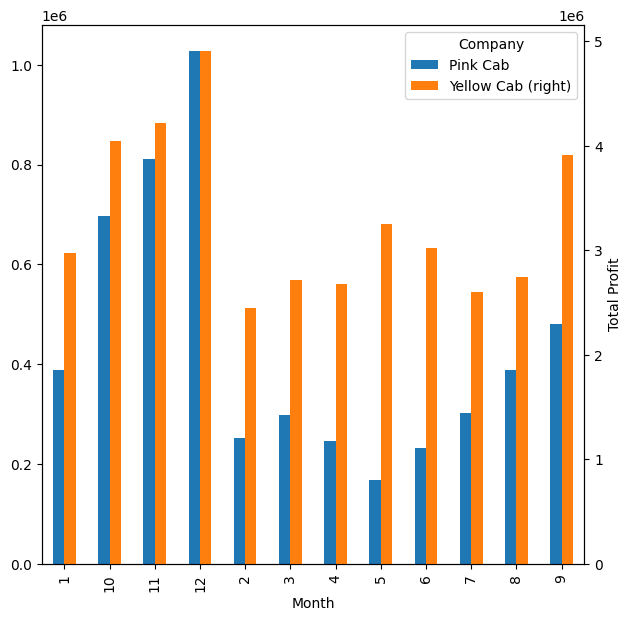

In [72]:
#Which months and which years were the most profitable for each company?
profitYear = cabData.groupby(['Year', 'Company'])['Profit'].sum().unstack().plot(kind="bar", ylabel="Total Profit", secondary_y='Yellow Cab', figsize=(7,7))
profitMonth = cabData.groupby(['Month', 'Company'])['Profit'].sum().unstack().plot(kind = 'bar', ylabel="Total Profit", secondary_y='Yellow Cab', figsize=(7,7))

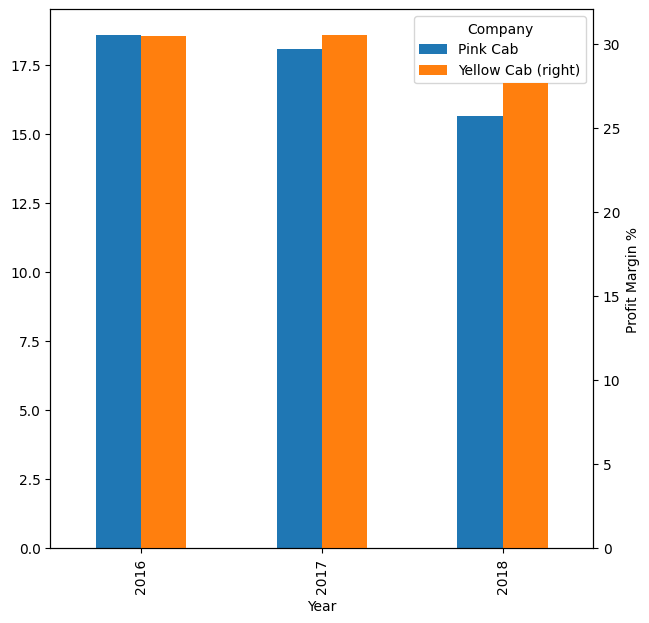

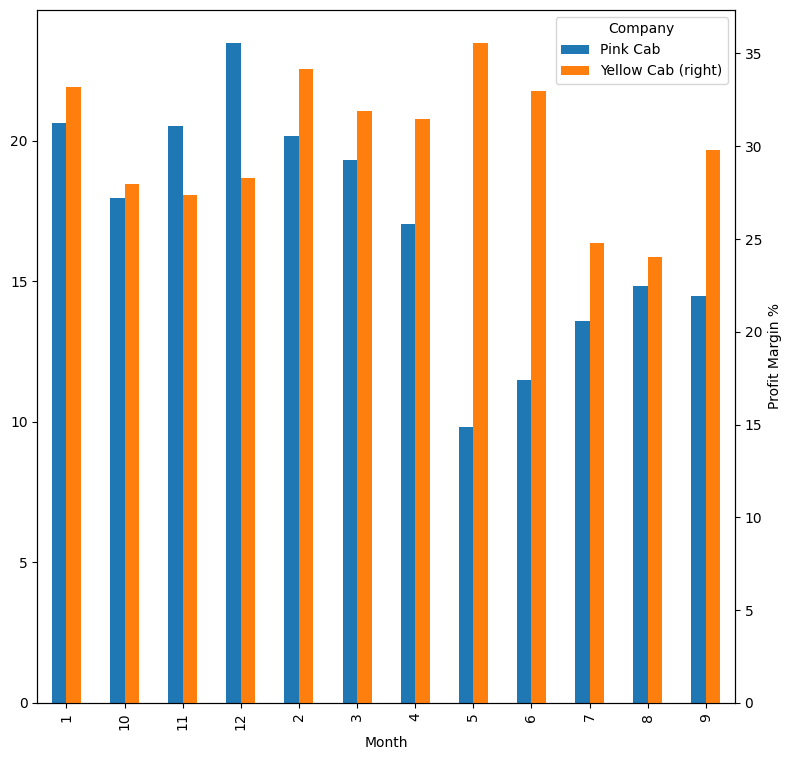

In [73]:
#what is the average yearly and monthly profit margin
profitMarginYear = cabData.groupby(['Year', 'Company'])['Profit Margin'].mean().unstack().plot(kind="bar", ylabel="Profit Margin %", secondary_y='Yellow Cab', figsize=(7,7))
profitMarginMonth = cabData.groupby(['Month', 'Company'])['Profit Margin'].mean().unstack().plot(kind="bar", ylabel="Profit Margin %", secondary_y='Yellow Cab', figsize=(9,9))


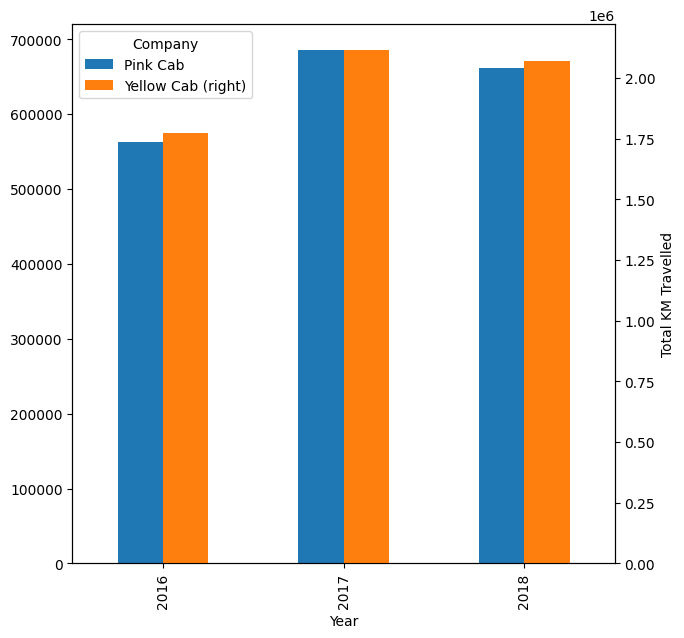

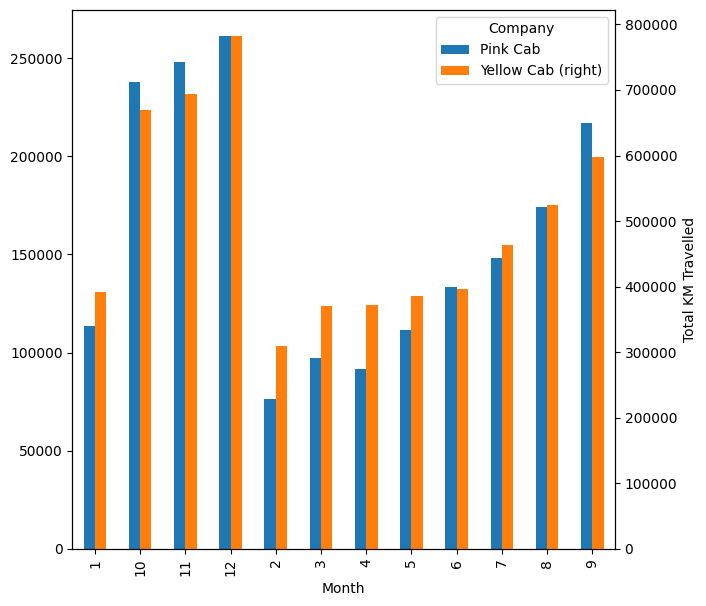

In [74]:
#which years and which months saw the most travel for each company?
travelYear = cabData.groupby(['Year', 'Company'])['KM Travelled'].sum().unstack().plot(kind="bar",ylabel="Total KM Travelled", secondary_y='Yellow Cab', figsize=(7,7))
travelMonth = cabData.groupby(['Month', 'Company'])['KM Travelled'].sum().unstack().plot(kind="bar", ylabel="Total KM Travelled", secondary_y='Yellow Cab', figsize=(7,7))

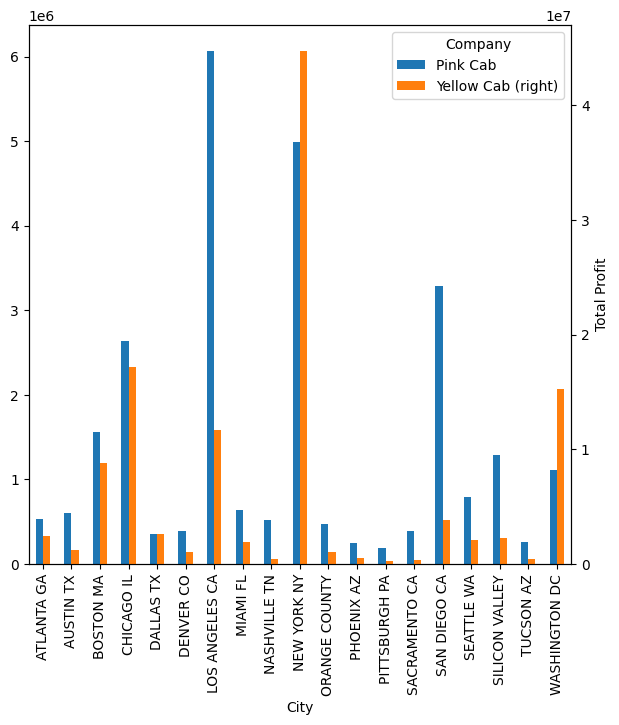

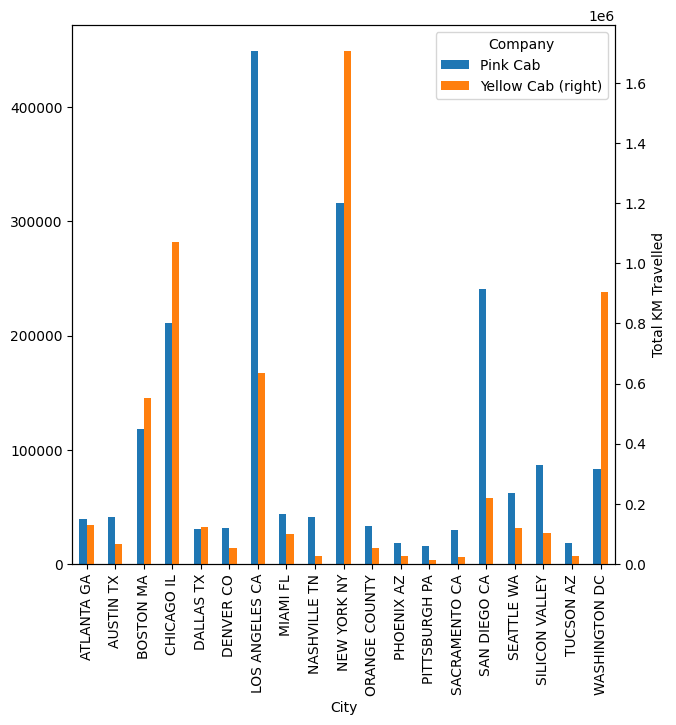

In [75]:
#which cities generate the most profit and kilometers travelled for each company?
cities = cabData.groupby(['City', 'Company'])['Price Charged'].sum().unstack().plot(kind="bar",ylabel="Total Profit", secondary_y='Yellow Cab', figsize=(7,7))
kilometers = cities = cabData.groupby(['City', 'Company'])['KM Travelled'].sum().unstack().plot(kind="bar",ylabel="Total KM Travelled", secondary_y='Yellow Cab', figsize=(7,7))